load the dataset

In [17]:
import pandas as pd
data = pd.read_csv('tweet_emotions.csv')


## Data exploration

In [18]:
data

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


tweet id column serves no function, so i drop it

In [19]:
data = data.drop('tweet_id', axis=1)


In [20]:
data['sentiment'].value_counts()

sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64

#### Visualization of the results

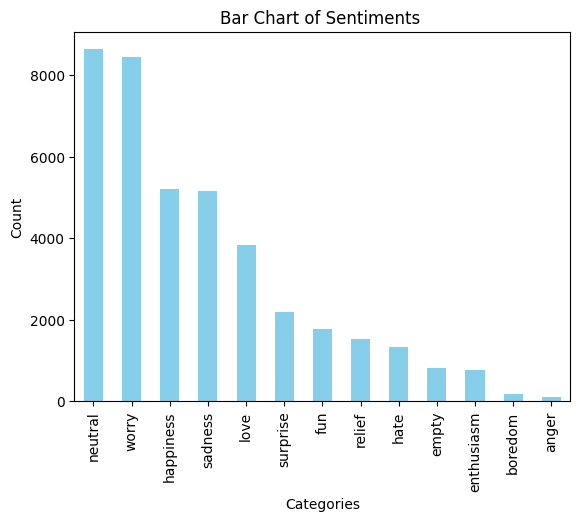

In [21]:
import matplotlib.pyplot as plt

data['sentiment'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Sentiments ')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()


In [22]:
print(data['sentiment'].isnull().sum())

data['content'].isnull().sum()



0


0

#### Convert text to lowercase, remove stopwords, punctuation, numbers, and unnecessary whitespace


In [27]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))  
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data['content'] = data['content'].apply(clean_text)


In [28]:
data.isnull().sum()

sentiment    0
content      0
dtype: int64